In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [62]:
array_size = 200
R_max = 100

def Rings(R_max):

    ij_rings = ()
    linind_rings = ()

    for ring_radius in np.arange(R_max+1):
        if ring_radius == 0:
            ring_mask = 1

        else:
            x = np.arange(-ring_radius,ring_radius+1)
            y = x
            X, Y = np.meshgrid(x, y) # , indexing='ij'
            ring_mask = np.floor(np.sqrt(X**2 + Y**2)) == ring_radius
        
        # linear index of the ring point on the full array:
        ij_rings = ij_rings + (np.nonzero(ring_mask),)
        linind_rings = linind_rings + (np.nonzero(np.ravel(ring_mask)),)
        
    return ij_rings, linind_rings

In [66]:
# ij_rings, linind_rings = Rings(100)
# linind_rings
# ij_rings = Rings(R_max)
# ij_nind_rings[2][0]

In [48]:
A = [[0,2,5],[9,4,0],[0,0,1]]
nz_A = np.nonzero(A)
nz_A
# ravel_A = np.ravel(A)
# where_ravel_A = np.where(ravel_A)
# where_ravel_A

(array([0, 0, 1, 1, 2], dtype=int64), array([1, 2, 0, 1, 2], dtype=int64))

In [2]:
# example for input data:

array1 = np.zeros([array_size,array_size])
array2 = np.zeros([array_size,array_size])

array1[100,100] = 1
array2[np.random.rand(array_size,array_size) < 0.1] = 1



In [82]:
def GR_ij(array1,array2,R_max,ij_rings):

    gr = np.zeros(R_max+1)

    for ring_radius in np.arange(R_max+1):
        if ring_radius == 0:
            ring_mask = 1
            ring_area = 1
            rings_conv_array1 = array1
        else:
            ring_mask = np.zeros((2*ring_radius+1,2*ring_radius+1))
            print(ring_radius)
            
            i_rings = ij_rings[ring_radius][0]
            j_rings = ij_rings[ring_radius][1]
            ring_mask[i_rings,j_rings] = 1
            # number of pixels that the ring is made of:
            ring_area = sum(sum(1*ring_mask))
        
            # putting the ring on the full array:
            rings_conv_array1 = scipy.signal.convolve2d(array1, ring_mask, mode='same')

        # linear index of the ring point on the full array:
        ij_array2 = np.nonzero(array2)

        # sum over values on ring:
        values_on_ring = rings_conv_array1[ij_array2]

        # sum devided by ring area:
        normalized_values_on_ring = np.sum(values_on_ring)/ring_area
        
        # fill factor of array2:
        fill_factor2 = np.sum(array2)/array2.size
        
        # gr:
        gr[ring_radius] = normalized_values_on_ring/fill_factor2
        
    return gr


In [83]:
gr = GR_ij(array1,array2,R_max,ij_rings)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [68]:
def GR(array1,array2,R_max):

    gr = np.zeros(R_max+1)

    for ring_radius in np.arange(R_max+1):
        if ring_radius == 0:
            ring_mask = 1
            ring_area = 1
            rings_conv_array1 = array1
        else:
            x = np.arange(-ring_radius,ring_radius+1)
            y = x
            X, Y = np.meshgrid(x, y) # , indexing='ij'
            ring_mask = np.floor(np.sqrt(X**2 + Y**2)) == ring_radius
            
            # number of pixels that the ring is made of:
            ring_area = sum(sum(1*ring_mask))
        
            # putting the ring on the full array:
            rings_conv_array1 = scipy.signal.convolve2d(array1, ring_mask, mode='same')

        # linear index of the ring point on the full array:
#         linind_array2 = np.where(np.ravel(array2))
        ij_array2 = np.nonzero(array2)

        # sum over values on ring:
        values_on_ring = rings_conv_array1[ij_array2]

        # sum devided by ring area:
        normalized_values_on_ring = np.sum(values_on_ring)/ring_area
        
        # fill factor of array2:
        fill_factor2 = np.sum(array2)/array2.size
        
        # gr:
        gr[ring_radius] = normalized_values_on_ring/fill_factor2
        
    return gr


In [44]:
gr = GR(array1,array2,R_max)

IndexError: index 201 is out of bounds for axis 0 with size 200

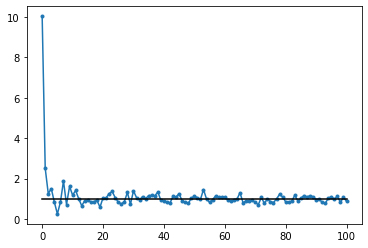

In [84]:
rs = np.arange(R_max+1)

plt.plot(rs,gr,'.-')
plt.plot([0, R_max],[1, 1],'-',color='k')

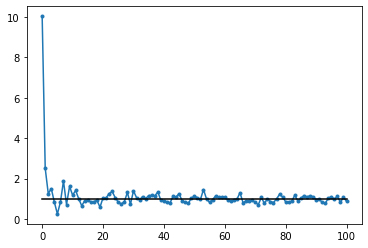

In [11]:
rs = np.arange(R_max+1)

plt.plot(rs,gr,'.-')
plt.plot([0, R_max],[1, 1],'-',color='k')